# Packages

In [52]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from tabulate import tabulate
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial' # Choose a nice font here
plt.rcParams['font.size'] = 7 # standard font size
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
plt.rcParams['figure.facecolor'] = 'white' # make sure background isn't transparent
plt.rcParams['figure.dpi'] = 150

# Read data

In [53]:
data_raw = pd.read_csv('raw data.csv')
d   = data_raw['DOY']
at   = data_raw['air_temperature']
ev  = data_raw['ET']
eva  = data_raw['ET']
e  = data_raw['ET']
cf  = data_raw['co2_flux']
co = data_raw['co2_flux']
c = data_raw['co2_flux']

In [54]:
data_Hourly = pd.read_csv('Hourly Variables.csv')
h   = data_Hourly['Hours']
t   = data_Hourly['Temp']
et  = data_Hourly['ET']
co2  = data_Hourly['CO2']
ch4  = data_Hourly['CH4']

In [55]:
data_m = pd.read_csv('CH4_Mean.csv')
T  = data_m['time']
sm  = data_m['Summer_ch4_flux']

In [56]:
df = pd.read_csv('Season.Corr.csv')

# Analysis

In [57]:
d_bins = np.linspace(0,365)
d_binmids = d_bins[1:]-np.diff(d_bins)[0]/2
at_binmeans = np.empty((len(d_bins)-1))
at_bin25 = np.empty((len(d_bins)-1))
at_bin75 = np.empty((len(d_bins)-1))
for i in range(len(d_bins)-1):
    at_binmeans[i] = np.mean(at[(d>d_bins[i])&(d<=d_bins[i+1])])
    
d_bins = np.linspace(0,365)
d_binmids = d_bins[1:]-np.diff(d_bins)[0]/2
cf_binmeans = np.empty((len(d_bins)-1))
cf_bin25 = np.empty((len(d_bins)-1))
cf_bin75 = np.empty((len(d_bins)-1))
for i in range(len(d_bins)-1):
    cf_binmeans[i] = np.mean(cf[(d>d_bins[i])&(d<=d_bins[i+1])])
    

In [58]:
at_bins = np.linspace(280,310)
at_binmids = at_bins[1:]-np.diff(at_bins)[0]/2
co_binmeans = np.empty((len(at_bins)-1))
co_bin25 = np.empty((len(at_bins)-1))
co_bin75 = np.empty((len(at_bins)-1))
for i in range(len(at_bins)-1):
    co_binmeans[i] = np.mean(co[(at>at_bins[i])&(at<=at_bins[i+1])])
    co_bin25[i] = np.percentile(co[(at>at_bins[i])&(at<=at_bins[i+1])],25)
    co_bin75[i] = np.percentile(co[(at>at_bins[i])&(at<=at_bins[i+1])],75)

ev_bins = np.linspace(0.05,0.5)
ev_binmids = ev_bins[1:]-np.diff(ev_bins)[0]/2
cf_binmeans = np.empty((len(ev_bins)-1))
cf_bin25 = np.empty((len(ev_bins)-1))
cf_bin75 = np.empty((len(ev_bins)-1))
for i in range(len(ev_bins)-1):
    cf_binmeans[i] = np.mean(cf[(ev>ev_bins[i])&(ev<=ev_bins[i+1])])
    cf_bin25[i] = np.percentile(cf[(ev>ev_bins[i])&(ev<=ev_bins[i+1])],25)
    cf_bin75[i] = np.percentile(cf[(ev>ev_bins[i])&(ev<=ev_bins[i+1])],75)

In [59]:
data_Hourly = data_Hourly[['Temp', 'ET', 'CO2', 'CH4']]
cor = data_Hourly.corr()

# Plots

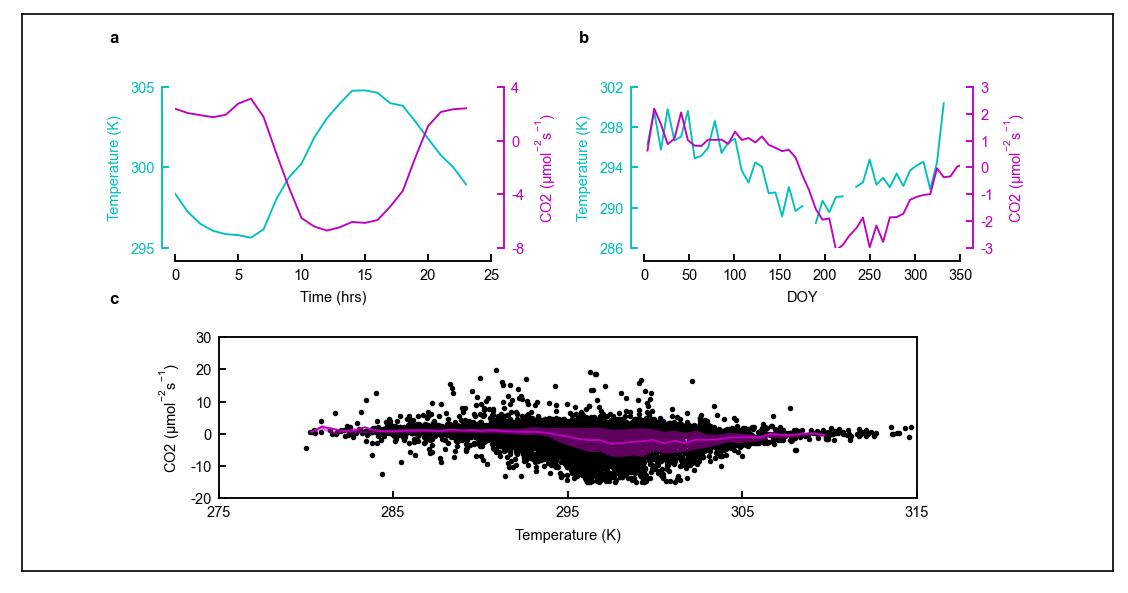

In [60]:
draft = True

lw = 0.9

hbuf = 0.01
wbuf = 0.14
cbh  = 0.01
pltspan = 0.29
blowbuf = 0.04
labbuf  = 0.06

ax0l,ax0b,ax0w,ax0h = 0.14,0.58,pltspan,pltspan
cb0l,cb0b,cb0w,cb0h = ax0l,ax0b+ax0h+hbuf,ax0w,cbh
ax1l,ax1b,ax1w,ax1h = ax0l+ax0w+wbuf,ax0b,ax0w,ax0h
cb1l,cb1b,cb1w,cb1h = ax1l,ax1b+ax1h+hbuf,ax1w,cbh
ax2l,ax2b,ax2w,ax2h = ax0l+blowbuf,0.13,ax0w*2+wbuf-2*blowbuf,ax0h

hticks = [0, 5, 10, 15, 20, 25]
tticks = [295,300,305]
etticks = [-8, -4, 0, 4]

yaticks = [0, 50, 100, 150, 200, 250, 300, 350]
ATticks = [286, 290, 294, 298, 302]
corrticks = [-3, -2, -1, 0, 1, 2, 3]

etaticks = [-20, -10, 0, 10, 20, 30]
Tticks = [275, 285, 295, 305, 315]


boxheight = 0.1

tcol = 'c'
rcol = 'm'
kcol = 'k'
ecol = 'r'
bcol = 'c'
gcol = 'm'

fig = plt.gcf()

ax00 = fig.add_axes([0,0,1,1])
ax00.text(cb0l-labbuf,cb0b+cbh+labbuf,'a',fontsize=8, weight='bold')
ax00.text(cb1l-labbuf,cb1b+cbh+labbuf,'b',fontsize=8, weight='bold')
ax00.text(ax2l-blowbuf-labbuf,ax2b+ax2h+labbuf,'c',fontsize=8, weight='bold')

if draft:
    plt.xticks([])
    plt.yticks([])
else:
    plt.axis('off')

#First plot...  
ax0 = fig.add_axes([ax0l,ax0b,ax0w,ax0h])
plt.plot(h,t,lw=lw,c=tcol)

ax0.set_xlim(hticks[0],hticks[-1])
ax0.set_xticks(hticks)
ax0.set_xticklabels(hticks)
ax0.set_xlabel('Time (hrs)')

ax0.set_ylim(tticks[0],tticks[-1])
ax0.set_yticks(tticks)
ax0.set_yticklabels(tticks)
ax0.set_ylabel('Temperature (K)', c=tcol)

ax1 = ax0.twinx()
plt.plot(h,co2,c=rcol,lw=lw)

ax1.set_xlim(hticks[0],hticks[-1])
ax1.set_xticks(hticks)
ax1.set_xticklabels(hticks)
ax1.set_xlabel('Time (hrs)')

ax1.set_ylim(etticks[0],etticks[-1])
ax1.set_yticks(etticks)
ax1.set_yticklabels(etticks)
ax1.set_ylabel('CO2 (${\mu}$mol$^{-2}$s$^{-1}$)', c=rcol)

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_color(tcol)
ax0.tick_params(axis='y', colors=tcol)
ax0.spines['left'].set_position(('axes', -blowbuf))
ax0.spines['bottom'].set_position(('axes', -2*blowbuf))

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_color(rcol)
ax1.tick_params(axis='y', colors=rcol)
ax1.spines['right'].set_position(('axes', 1+blowbuf))


#Second plot....
ax2 = fig.add_axes([ax1l,ax1b,ax1w,ax1h])
plt.plot(d_binmids,at_binmeans,lw=lw,c=bcol)

ax2.set_xlim(yaticks[0],yaticks[-1])
ax2.set_xticks(yaticks)
ax2.set_xticklabels(yaticks)
ax2.set_xlabel('DOY')

ax2.set_ylim(ATticks[0],ATticks[-1])
ax2.set_yticks(ATticks)
ax2.set_yticklabels(ATticks)
ax2.set_ylabel('Temperature (K)', c=bcol)

ax3 = ax2.twinx()
plt.plot(d_binmids,co_binmeans,c=gcol,lw=lw)

ax3.set_xlim(yaticks[0],yaticks[-1])
ax3.set_xticks(yaticks)
ax3.set_xticklabels(yaticks)
ax3.set_xlabel('DOY')

ax3.set_ylim(corrticks[0],corrticks[-1])
ax3.set_yticks(corrticks)
ax3.set_yticklabels(corrticks)
ax3.set_ylabel('CO2 (${\mu}$mol$^{-2}$s$^{-1}$)', c=gcol)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color(bcol)
ax2.tick_params(axis='y', colors=bcol)
ax2.spines['left'].set_position(('axes', -blowbuf))
ax2.spines['bottom'].set_position(('axes', -2*blowbuf))

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_color(gcol)
ax3.tick_params(axis='y', colors=gcol)
ax3.spines['right'].set_position(('axes', 1+blowbuf))

#Third plot

ax4 = fig.add_axes([ax2l,ax2b,ax2w,ax2h])

ax4.scatter(at,co,lw=lw,c=kcol, s=3)

ax4.plot(at_binmids,co_binmeans,lw=lw,c=rcol)
ax4.fill_between(at_binmids,co_bin25,co_bin75,color=rcol,alpha=0.5,lw=0)

ax4.set_xlim(Tticks[0],Tticks[-1])
ax4.set_xticks(Tticks)
ax4.set_xticklabels(Tticks)
ax4.set_xlabel('Temperature (K)')

ax4.set_ylim(etaticks[0],etaticks[-1])
ax4.set_yticks(etaticks)
ax4.set_yticklabels(etaticks)
ax4.set_ylabel('CO2 (${\mu}$mol$^{-2}$s$^{-1}$)')


#other...
ax0.tick_params(width=lw,which='both',direction='in')
ax1.tick_params(width=lw,which='both',direction='in')
ax2.tick_params(width=lw,which='both',direction='in')
ax3.tick_params(width=lw,which='both',direction='in')
ax4.tick_params(width=lw,which='both',direction='in')
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(lw)
    ax1.spines[axis].set_linewidth(lw)   
    ax2.spines[axis].set_linewidth(lw)
    ax3.spines[axis].set_linewidth(lw)
    ax4.spines[axis].set_linewidth(lw)
    

fig.set_size_inches(80/11,89/24,forward=True)
if draft==False:
    plt.savefig('data.TempCO2.pdf',dpi=300)
    plt.savefig('data.TempCO2.png',dpi=300)

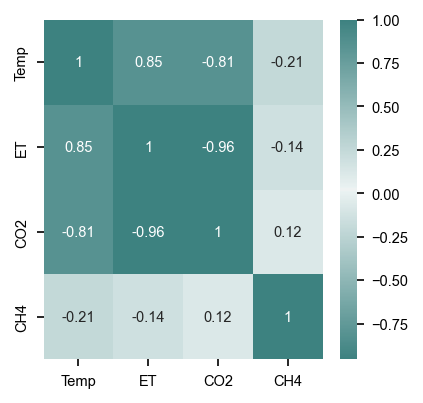

In [61]:
plt.figure(figsize = (3, 3))
sns.heatmap(data_Hourly.corr(), annot = True, cmap= (sns.diverging_palette(190, 190, as_cmap=True)))
plt.savefig('Corr.png',dpi=300)

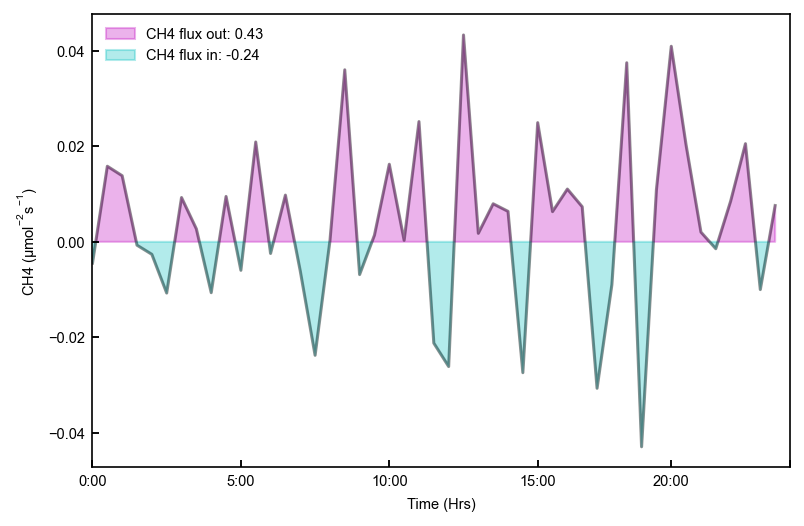

In [62]:
Hticks = [0, 10, 20, 30, 39, 47]

plt.plot(T, sm, color = 'k', alpha = 0.4)
plt.xlabel('Time (Hrs)')
plt.ylabel('CH4 (${\mu}$mol$^{-2}$s$^{-1}$)')
plt.fill_between(T, sm, where = sm > 0, alpha=0.30, color='m', interpolate=True, label = 'CH4 flux out: 0.43')
plt.fill_between(T, sm, where = sm < 0, alpha=0.30, color='c', interpolate=True, label = 'CH4 flux in: -0.24')

plt.legend(frameon=False)

plt.xlim(Hticks[0],Hticks[-1])
plt.xticks(Hticks)

plt.tick_params(width=lw,which='both',direction='in')
plt.savefig('CH4.png',dpi=300)

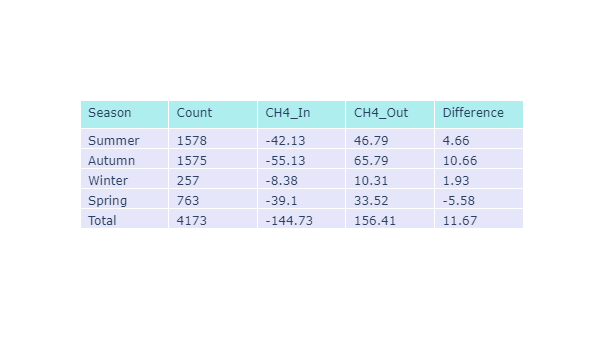

<Figure size 900x600 with 0 Axes>

In [63]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.Season, df.Count, df.CH4_In, df.CH4_Out, df.Difference],
               fill_color='lavender',
               align='left'))
])
fig.show()
plt.savefig('CH42021.pdf',dpi=300)